# 中文文本分类

## 1.语料

- 使用[搜狐新闻数据(SogouCS)](http://www.sogou.com/labs/resource/cs.php)的精简版数据，考虑到实现规模，随机选取其中的一小部分作为训练集、验证集和测试集。
- 使用BeautifulSoup库解析并提取该语料中的**`新闻正文`**及对应的**`类标号`**，具体实现请看*`load_data.py`*。

In [1]:
# load_data.py
from load_data import load_data

# training dataset
training_filename = ['./SogouCS.reduced/news.sohunews.010806.txt', 
                  './SogouCS.reduced/news.sohunews.020806.txt', 
                  './SogouCS.reduced/news.sohunews.030806.txt',
                  './SogouCS.reduced/news.sohunews.050806.txt']
                  # './SogouCS.reduced/news.sohunews.040806.txt',
                  # './SogouCS.reduced/news.sohunews.050806.txt']

# validating dataset
validating_filename = ['./SogouCS.reduced/news.sohunews.040806.txt']
                # './SogouCS.reduced/news.sohunews.070806.txt']

# 解析并提取该语料中的文本内容及对应的类标号
training_labels, training_cons = load_data(training_filename)
validating_labels, validating_cons = load_data(validating_filename)

# 查看数据集的大小
print("number of training sample: %d" % len(training_labels))
print("number of validating sample: %d" % len(validating_labels))

载入数据完成！
载入数据完成！
number of training sample: 13059
number of validating sample: 3282


从输出可以看到：

- 训练集包含13059篇新闻
- 验证集包含3282篇新闻

## 2.分词

- 选取了jieba（项目见[Github](https://github.com/fxsjy/jieba)）这个专门用于中文分词的python工具，使用它来进行中文分词操作。
- 使用了*`stopwords.txt`*停用词表，对jieba分词后的文本进行去停用词操作。
- 最后将分词及去停用词后的文本，保存在*`training_seg_corpus.txt`*和*`validating_seg_corpus.txt`*。
- 具体实现请看*`seg_corpus.py`*。

### 分词及去停用词

In [2]:
# seg_corpus.py
from seg_corpus import seg_corpus

seg_corpus(training_cons, './training_seg_corpus.txt')
seg_corpus(validating_cons, './validating_seg_corpus.txt')

Building prefix dict from C:\Anaconda3\lib\site-packages\jieba\dict.txt ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache


载入停用词完成！


Loading model cost 2.183000087738037 seconds.
Prefix dict has been built succesfully.


分词和去停用词完成！
载入停用词完成！
分词和去停用词完成！


### 查看分词情况

In [3]:
with open('./training_seg_corpus.txt', 'r', encoding='utf-8') as f:
    training_corpus = f.readlines()
    
with open('./validating_seg_corpus.txt', 'r', encoding='utf-8') as f:
    validating_corpus = f.readlines()
    
print("#training sample: %d" % len(training_corpus))
print(training_corpus[0])

print("#validating sample: %d" % len(validating_corpus))
print(validating_corpus[0])

#training sample: 13059
反对 宪法 原则 危害 国家 安全 政权 稳定 统一 煽动 民族 仇恨 民族 歧视 宣扬 邪教 封建迷信 散布 谣言 破坏 稳定 侮辱 诽谤 侵害 合法权益 散布 淫秽 色情 赌博 暴力 凶杀 恐怖 教唆 犯罪

#validating sample: 3282
提供 资料 信息 仅供 投资者 参考 构成 投资 建议 财经频道 联系方式 热线电话



同样从输出可以看到：

- 训练集包含13059篇新闻
- 验证集包含3282篇新闻
- jieba分词的效果很好

## 3.向量化表示

文本数据属于非结构化的数据，一般要转换成结构化的数据，才能进行实施机器学习算法实现文本分类。

常见的做法是将文本转换成『文档-词项矩阵』。矩阵中的元素，可以使用**词频**，或者**TF-IDF**值等。

### 3.1 计算词频

为了将原始文本转换成分类算法可以使用的特征数据，这里使用词袋(bag-of-word)方法来衡量文本间相似性，最终生成每个文本的特征向量。

词袋方法基于简单的词频统计；统计每一个文本中的词频，表示成一个向量，即向量化。

我们将使用Scikit-learn中的[**CountVectorizer**](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)来完成这项工作，它可以高效地完成词频统计的工作。

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(min_df=1) # min_df最小词频
training_corpus_counts = count_vect.fit_transform(training_corpus)
validating_corpus_counts = count_vect.transform(validating_corpus)

num_training_samples, num_training_features = training_corpus_counts.shape
print("#training sample: %d, #feature: %d" % (num_training_samples, num_training_features))

num_validating_samples, num_validating_features = validating_corpus_counts.shape
print("#validating sample: %d, #feature: %d" % (num_validating_samples, num_validating_features))

#training sample: 13059, #feature: 91904
#validating sample: 3282, #feature: 91904


从输出可以看到：

- 13059个训练文档包含了91904个词语，也就是说训练集表示成了13059 * 91904的一个矩阵。

### 3.2 计算TF-IDF

这里使用TF-IDF来将原始文本转换成分类算法可以使用的特征数据。使用sklearn中的[**TfidfTransformer**](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html)来完成。

In [5]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
training_corpus_tfidf = tfidf_transformer.fit_transform(training_corpus_counts)
validating_corpus_tfidf = tfidf_transformer.transform(validating_corpus_counts)

num_training_samples, num_training_features = training_corpus_tfidf.shape
print("#training sample: %d, #feature: %d" % (num_training_samples, num_training_features))

num_validating_samples, num_validating_features = validating_corpus_tfidf.shape
print("#validating sample: %d, #feature: %d" % (num_validating_samples, num_validating_features))

#training sample: 13059, #feature: 91904
#validating sample: 3282, #feature: 91904


## 4.分类器训练

### 4.1 kNN

这里使用sklearn中的[**KNeighborsClassifier**](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)来训练模型，并在验证集上进行预测。

In [6]:
from time import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

t0 = time()
knnclf = KNeighborsClassifier()
knnclf.fit(training_corpus_tfidf, training_labels)
print('training complete!\ntraining time %.3f s'% round(time()-t0, 3))

t1 = time()
knnpred = knnclf.predict(validating_corpus_tfidf)
print('validating complete!\nvalidating time %.3f s'% round(time()-t1, 3))

accuracy = accuracy_score(validating_labels, knnpred)
print("Accuracy:", accuracy)

training complete!
training time 0.031 s
validating complete!
validating time 6.279 s
Accuracy: 0.326020719074


从输出可以看到：

- 训练时间远小于预测时间，这是因为kNN算法训练只是简单得把数据储存起来，而预测时需要进行大量的运算以找出k最近邻来进行预测，所有预测所需时间要长。
- 使用sklearn中的KNeighborsClassifier分类器默认参数时，预测精确率只有0.326。
- 这个分类器能优化吗？

### 4.2 朴素贝叶斯

这里使用sklearn中的[**MultinomialNB**](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)来训练模型，并在验证集上进行预测。

In [7]:
from sklearn.naive_bayes import MultinomialNB

t0 = time()
mnbclf = MultinomialNB()
mnbclf.fit(training_corpus_tfidf, training_labels)
print('training complete!\ntraining time %.3f s'% round(time()-t0, 3))

t1 = time()
mnbpred = mnbclf.predict(validating_corpus_tfidf)
print('validating complete!\nvalidating time %.3f s'% round(time()-t1, 3))

accuracy = accuracy_score(validating_labels, mnbpred)
print("Accuracy:", accuracy)

training complete!
training time 0.471 s
validating complete!
validating time 0.153 s
Accuracy: 0.742230347349


从输出可以看到：

- 训练时间与预测时间的总和要比上面的kNN算法要少好几倍
- 精确率达到了0.742，这比上面的kNN算法好两倍多
- 综合来看，这里的朴素贝叶斯算法比上面的kNN算法要好很多
- 这个结果还能提升吗？

## 5.分类器优化

### 5.1 特征选择

特征选择对模型训练来说非常重要。好的特征选择能够提升模型的性能，更能帮助我们理解数据的特点、底层结构，这对进一步改善模型、算法都有着重要作用。

特征选择主要有两个功能：

1. 减少特征数量、降维，使模型泛化能力更强，减少过拟合
2. 增强对特征和特征值之间的理解

对分词和去停用词后，得到初步的91904个候选特征。

现在结合文档频率（DF）进行过滤，将DF小于5的词项过滤掉:

In [8]:
best_count_vect = CountVectorizer(min_df=5)
training_corpus_counts = best_count_vect.fit_transform(training_corpus)
validating_corpus_counts = best_count_vect.transform(validating_corpus)

num_training_samples, num_training_features = training_corpus_counts.shape
print("#training sample: %d, #feature: %d" % (num_training_samples, num_training_features))

num_validating_samples, num_validating_features = validating_corpus_counts.shape
print("#validating sample: %d, #feature: %d" % (num_validating_samples, num_validating_features))

#training sample: 13059, #feature: 33603
#validating sample: 3282, #feature: 33603


经过DF过滤后，得到初步的33603个候选特征。

In [9]:
best_tfidf_transformer = TfidfTransformer()
training_corpus_tfidf = best_tfidf_transformer.fit_transform(training_corpus_counts)
validating_corpus_tfidf = best_tfidf_transformer.transform(validating_corpus_counts)

num_training_samples, num_training_features = training_corpus_tfidf.shape
print("#training sample: %d, #feature: %d" % (num_training_samples, num_training_features))

num_validating_samples, num_validating_features = validating_corpus_tfidf.shape
print("#validating sample: %d, #feature: %d" % (num_validating_samples, num_validating_features))

#training sample: 13059, #feature: 33603
#validating sample: 3282, #feature: 33603


### KBest

接着使用卡方统计量来进行特征提取，然后使用sklearn中的[**SelectKBest**](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)来选择chi值最大的k个特征。

### kNN

In [10]:
from sklearn.feature_selection import SelectKBest, chi2

knn_accuracy = []
for k in range(500, num_training_features, 500):
    ch2 = SelectKBest(chi2, k=k)

    training_corpus_chi2 = ch2.fit_transform(training_corpus_tfidf, training_labels)
    validating_corpus_chi2 = ch2.transform(validating_corpus_tfidf)
    
    knnclf = KNeighborsClassifier()
    knnclf.fit(training_corpus_chi2, training_labels)
    knnpred = knnclf.predict(validating_corpus_chi2)
    accuracy = accuracy_score(validating_labels, knnpred)
    knn_accuracy.append(accuracy)

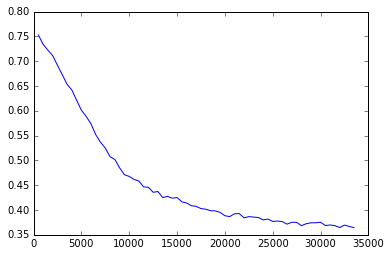

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

features = [i for i in range(500, num_training_features, 500)]
plt.plot(features, knn_accuracy)

从上图可以看出，随着选择的特征数量的增加，kNN分类器的准确率降低。而在k=500时，即选择chi值最大的500个特征时，准确率最高，达到了0.75，比起未进行特征选择时，提高了三倍。

### MultinomialNB

In [12]:
mnb_accuracy = []
for k in range(500, num_training_features, 500):
    ch2 = SelectKBest(chi2, k=k)

    training_corpus_chi2 = ch2.fit_transform(training_corpus_tfidf, training_labels)
    validating_corpus_chi2 = ch2.transform(validating_corpus_tfidf)
    
    mnbclf = MultinomialNB()
    mnbclf.fit(training_corpus_chi2, training_labels)
    mnbpred = mnbclf.predict(validating_corpus_chi2)
    accuracy = accuracy_score(validating_labels, mnbpred)
    mnb_accuracy.append(accuracy)

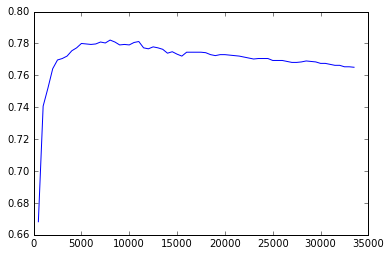

In [13]:
features = [i for i in range(500, num_training_features, 500)]
plt.plot(features, mnb_accuracy)

从上图可以看出，随着选择的特征数量的增加，准确率先迅速增加，在选择的特征数量达到5000时，缓慢减小。准确率最高达到了0.78，比起未进行特征选择时，提高了0.04，效果不怎么明显。

### 5.2 参数调优

### kNN

In [14]:
knnch2 = SelectKBest(chi2, k=500)

training_corpus_knnchi2 = knnch2.fit_transform(training_corpus_tfidf, training_labels)
validating_corpus_knnchi2 = knnch2.transform(validating_corpus_tfidf)

In [15]:
knn_accuracy = []
for k in range(1, 50):
    knnclf = KNeighborsClassifier(n_neighbors=k)
    knnclf.fit(training_corpus_knnchi2, training_labels)
    knnpred = knnclf.predict(validating_corpus_knnchi2)
    accuracy = accuracy_score(validating_labels, knnpred)
    knn_accuracy.append(accuracy)

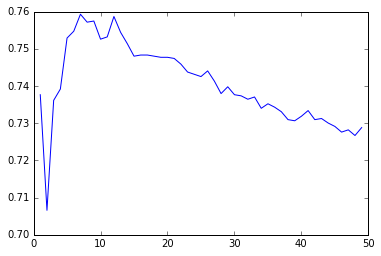

In [16]:
k = range(1, 50)
plt.plot(k, knn_accuracy)

从上图可以看出，总体上准确率随最近邻数k的增大，先增后减。在最近邻数k=7时，准确率最大，接近0.76。

In [17]:
best_knnch2 = SelectKBest(chi2, k=500)

training_corpus_knnchi2 = best_knnch2.fit_transform(training_corpus_tfidf, training_labels)
validating_corpus_knnchi2 = best_knnch2.transform(validating_corpus_tfidf)

best_knnclf = KNeighborsClassifier(n_neighbors=7)
best_knnclf.fit(training_corpus_knnchi2, training_labels)
knnpred = best_knnclf.predict(validating_corpus_knnchi2)
accuracy = accuracy_score(validating_labels, knnpred)
print("Accuracy:", accuracy)

Accuracy: 0.759293113955


### 朴素贝叶斯

In [26]:
best_mnbch2 = SelectKBest(chi2, k=8000)

training_corpus_mnbchi2 = best_mnbch2.fit_transform(training_corpus_tfidf, training_labels)
validating_corpus_mnbchi2 = best_mnbch2.transform(validating_corpus_tfidf)

best_mnbclf = MultinomialNB()
best_mnbclf.fit(training_corpus_mnbchi2, training_labels)
mnbpred = best_mnbclf.predict(validating_corpus_mnbchi2)
accuracy = accuracy_score(validating_labels, mnbpred)
print("Accuracy:", accuracy)

Accuracy: 0.782145033516


## 6.分类器性能评估

### 6.1 测试数据集

In [19]:
# testing dataset
testing_filename = ['./SogouCS.reduced/news.sohunews.070806.txt']

# 解析并提取该语料中的文本内容及对应的类标号
testing_labels, testing_cons = load_data(testing_filename)

# 查看数据集的大小
print("number of testing sample: %d" % len(testing_labels))

# 分词
seg_corpus(testing_cons, './testing_seg_corpus.txt')

with open('./testing_seg_corpus.txt', 'r', encoding='utf-8') as f:
    testing_corpus = f.readlines()

# DF
testing_corpus_counts = best_count_vect.transform(testing_corpus)
num_testing_samples, num_testing_features = testing_corpus_counts.shape
print("#testing sample: %d, #feature: %d" % (num_testing_samples, num_testing_features))

# TF-IDF
testing_corpus_tfidf = best_tfidf_transformer.transform(testing_corpus_counts)
num_testing_samples, num_testing_features = testing_corpus_tfidf.shape
print("#testing sample: %d, #feature: %d" % (num_testing_samples, num_testing_features))

载入数据完成！
number of testing sample: 3215
载入停用词完成！
分词和去停用词完成！
#testing sample: 3215, #feature: 33603
#testing sample: 3215, #feature: 33603


### 6.2 kNN

In [20]:
testing_corpus_knnchi2 = best_knnch2.transform(testing_corpus_tfidf)

knnpred = best_knnclf.predict(testing_corpus_knnchi2)
accuracy = accuracy_score(testing_labels, knnpred)
print("Accuracy:", accuracy)

Accuracy: 0.753965785381


In [21]:
from sklearn import metrics
print(metrics.classification_report(testing_labels, knnpred))

             precision    recall  f1-score   support

       auto       0.93      0.57      0.70        46
   business       0.79      0.73      0.76       496
        cul       0.50      0.04      0.08        24
     health       0.74      0.33      0.46        42
      house       0.96      0.81      0.87       530
         it       0.48      0.29      0.36        92
   learning       0.82      0.56      0.67        75
        mil       0.33      0.07      0.11        29
       news       0.50      0.80      0.62       625
     sports       0.94      0.88      0.91       845
     travel       0.77      0.43      0.56        69
      women       0.67      0.77      0.72       105
       yule       0.81      0.70      0.75       237

avg / total       0.79      0.75      0.76      3215



最终，kNN分类器在测试集上准确率到0.75，而精确度、召回率、F1值也在0.75附近，总体来说kNN分类器的效果不错。

### 6.3 MultinomialNB

In [27]:
testing_corpus_mnbchi2 = best_mnbch2.transform(testing_corpus_tfidf)

mnbpred = best_mnbclf.predict(testing_corpus_mnbchi2)
accuracy = accuracy_score(testing_labels, mnbpred)
print("Accuracy:", accuracy)

Accuracy: 0.785069984448


In [23]:
print(metrics.classification_report(testing_labels, mnbpred))

             precision    recall  f1-score   support

       auto       1.00      0.39      0.56        46
   business       0.73      0.85      0.79       496
        cul       0.00      0.00      0.00        24
     health       0.00      0.00      0.00        42
      house       0.98      0.84      0.90       530
         it       0.75      0.03      0.06        92
   learning       0.89      0.41      0.56        75
        mil       0.00      0.00      0.00        29
       news       0.58      0.85      0.69       625
     sports       0.90      0.95      0.92       845
     travel       1.00      0.19      0.32        69
      women       0.93      0.49      0.64       105
       yule       0.84      0.87      0.86       237

avg / total       0.79      0.79      0.76      3215



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


最终，MultinomialNB分类器在测试集上准确率到0.78，而精确度、召回率、F1值比kNN分类器稍微好一点。总的来说，MultinomialNB要比kNN好，无论是训练测试时间，还是准确率等。